In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('default')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/My Drive/seq/

/content/gdrive/My Drive/seq


In [4]:
def plot_a(ax, base, left_edge, height, color):
  a_polygon_coords = [
      np.array([[0.0, 0.0], [0.5, 1.0], [0.5, 0.8], [0.2, 0.0]]),
      np.array([[1.0, 0.0], [0.5, 1.0], [0.5, 0.8], [0.8, 0.0]]),
      np.array([[0.225, 0.45], [0.775, 0.45], [0.85, 0.3], [0.15, 0.3]])
  ]
  for polygon_coords in a_polygon_coords:
    ax.add_patch(matplotlib.patches.Polygon((np.array([1, height])[None, :] * polygon_coords + 
                                             np.array([left_edge, base])[None, :]),
                                             facecolor=color,edgecolor=color))


In [5]:
def plot_c(ax, base, left_edge, height, color):
  ax.add_patch(
      matplotlib.patches.Ellipse(
          xy=[left_edge + 0.65, base + 0.5 * height],
          width=1.3,
          height=height,
          facecolor=color,
          edgecolor=color))
  ax.add_patch(
      matplotlib.patches.Ellipse(
          xy=[left_edge + 0.65, base + 0.5 * height],
          width=0.7 * 1.3,
          height=0.7 * height,
          facecolor='white',
          edgecolor='white'))
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge + 1, base],
          width=1.0,
          height=height,
          facecolor='white',
          edgecolor='white',
          fill=True))

In [6]:
def plot_g(ax, base, left_edge, height, color):
  ax.add_patch(
      matplotlib.patches.Ellipse(
          xy=[left_edge + 0.65, base + 0.5 * height],
          width=1.3,
          height=height,
          facecolor=color,
          edgecolor=color))
  ax.add_patch(
      matplotlib.patches.Ellipse(
          xy=[left_edge + 0.65, base + 0.5 * height],
          width=0.7 * 1.3,
          height=0.7 * height,
          facecolor='white',
          edgecolor='white'))
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge + 1, base],
          width=1.0,
          height=height,
          facecolor='white',
          edgecolor='white',
          fill=True))
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge + 0.825, base + 0.085 * height],
          width=0.174,
          height=0.415 * height,
          facecolor=color,
          edgecolor=color,
          fill=True))
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge + 0.625, base + 0.35 * height],
          width=0.374,
          height=0.15 * height,
          facecolor=color,
          edgecolor=color,
          fill=True))

In [7]:
def plot_t(ax, base, left_edge, height, color):
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge + 0.4, base],
          width=0.2,
          height=height,
          facecolor=color,
          edgecolor=color,
          fill=True))
  ax.add_patch(
      matplotlib.patches.Rectangle(
          xy=[left_edge, base + 0.9 * height],
          width=1,
          height=0.1 * height,
          facecolor=color,
          edgecolor=color,
          fill=True))

In [8]:
default_colors = {0: 'red', 1: 'blue', 2: 'orange', 3: 'green'}
default_plot_funcs = {0: plot_a, 1: plot_c, 2: plot_g, 3: plot_t}

In [9]:
def seqlogo(seq_scores, start, end, ax=None):
  fig = plt.figure(figsize=(100, 5))
  if ax is None:
    ax = plt.gca()

  colors = ['red', 'blue', 'orange', 'green']
  plot_funcs = [plot_a, plot_c, plot_g, plot_t]

  seq_len = seq_scores.shape[0]
  seq_depth = seq_scores.shape[1]

  max_height = 0

  for li in range(seq_len):
    # sort nucleotides by score
    pos_scores = sorted([(seq_scores[li, ni], ni) for ni in range(seq_depth)])

    # maintain current height
    current_height = 0

    # for each nucleotide
    for di in range(seq_depth):
      score, ni = pos_scores[di]

      if score > 0:
        # plot nucleotide
        plot_funcs[ni](
            ax=ax,
            base=current_height,
            left_edge=li,
            height=score,
            color=colors[ni])

        # update height
        current_height += score

    # update max height
    max_height = max(max_height, current_height)

  # adjust limits
  xbuf = .005 * seq_len
  ax.set_xlim(-xbuf, seq_len + xbuf)

  ybuf = .05 * max_height
  upper = max_height + ybuf
  upper = 3.6
  ax.set_ylim(-ybuf, upper)
  #ax.set_ylim(-ybuf, ybuf)

  # adjust line widths
  for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0.1)

  # for r in unique_r:
  #   if r[0]>= start and r[1] <= end:
  #     plt.axvspan(r[0]-1-start, r[1]-start, color='orange', alpha=0.2)

  # motif in first 0-200
  # for r in unique_r:
  #   if r[0]> -1 and r[1] <= 200:
  #     plt.axvspan(r[0]-1, r[1], color='orange', alpha=0.2)

  # for r in unique_r:
  #   if r[0]> 200 and r[1] <= 400:
  #     plt.axvspan(r[0]-1-200, r[1]-200, color='orange', alpha=0.2)

  # for r in unique_r:
  #   if r[0]> 400 and r[1] <= 600:
  #     plt.axvspan(r[0]-1-400, r[1]-400, color='orange', alpha=0.2)
  
  # for r in unique_r:
  #   if r[0]> 600 and r[1] <= 800:
  #     plt.axvspan(r[0]-1-600, r[1]-600, color='orange', alpha=0.2)

  # for r in unique_r:
  #   if r[0]> 800 and r[1] <= 1001:
  #     plt.axvspan(r[0]-1-800, r[1]-800, color='orange', alpha=0.2)
  # plt.axvspan(652, 660, color='orange', alpha=0.3)
  # plt.axvspan(35, 47, color='orange', alpha=0.3)
  # plt.axvspan(192, 200, color='orange', alpha=0.3)

  plt.show()

In [10]:
def reverse(x):
    ori = []
    all_cap_letters = ['A', 'C', 'G', 'T']

    for c in range(len(x[0])):
        for r in range(4):
            if x[r][c] == 1:
                ori.append(all_cap_letters[r])

    return ''.join(ori)

In [19]:
weighted = np.load('./weight_inh.npy')

In [ ]:
top = np.argsort(np.max(weighted, axis=1))[-106:]

In [ ]:
top = top[::-1]

In [15]:
np.max(weighted)

1.6841953992843628

In [ ]:
import csv
tsv_file = open("fimo.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

In [ ]:
avi = []
for row in read_tsv:
  avi.append(row)

In [ ]:
avi = avi[:-4]
avi = avi[1:]

In [ ]:
rag = []
for a in avi:
  rag.append((int(a[3]),int(a[4])))

In [ ]:
unique_r = []
for r in rag:
  if r not in unique_r:
    unique_r.append(r)

In [ ]:
# isMotif = []
# for t in top:
#   found = False
#   for p in rag:
#     if t >= p[0] and t <= p[1]:
#       found = True
#       break
#   isMotif.append(found)

In [ ]:
unique_r

[(415, 424), (412, 423), (413, 422), (414, 425), (111, 120), (414, 423)]

In [ ]:
# np.array(isMotif)

In [ ]:
# from collections import Counter
# Counter(isMotif)

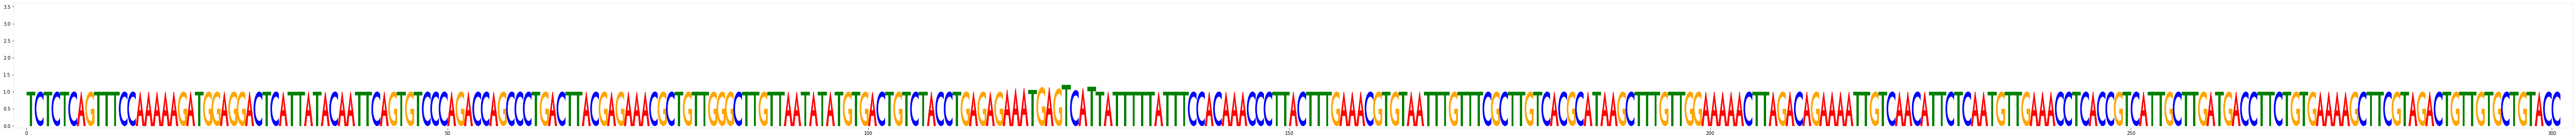

In [20]:
seqlogo(weighted[400:-300], 0, 1000)

In [ ]:
def expand_4l(sat_lg_ti, seq_1hot):
  """ Expand
    In:
        sat_lg_ti (l array): Sat mut loss/gain scores for a single sequence and
        target.
        seq_1hot (Lx4 array): One-hot coding for a single sequence.
    Out:
        sat_loss_4l (lx4 array): Score-hot coding?
    """

  # determine satmut length
  satmut_len = sat_lg_ti.shape[0]

  # jump to satmut region in one hot coded sequence
  ssi = int((seq_1hot.shape[0] - satmut_len) // 2)

  # filter sequence for satmut region
  seq_1hot_sm = seq_1hot[ssi:ssi + satmut_len, :]

  # tile loss scores to align
  sat_lg_tile = np.tile(sat_lg_ti, (4, 1)).T

  # element-wise multiple
  sat_lg_4l = np.multiply(seq_1hot_sm, sat_lg_tile)

  return sat_lg_4l


In [ ]:
def plot_seqlogo(ax, seq_1hot, sat_score_ti, pseudo_pct=0.05):
  """ Plot a sequence logo for the loss/gain scores.
    Args:
        ax (Axis): matplotlib axis to plot to.
        seq_1hot (Lx4 array): One-hot coding of a sequence.
        sat_score_ti (L_sm array): Minimum mutation delta across satmut length.
        pseudo_pct (float): % of the max to add as a pseudocount.
    """
  sat_score_cp = sat_score_ti.copy()
  satmut_len = len(sat_score_ti)

  # add pseudocounts
  sat_score_cp += pseudo_pct * sat_score_cp.max()

  # expand
  sat_score_4l = expand_4l(sat_score_cp, seq_1hot)

  plots.seqlogo(sat_score_4l, ax)                                                                                                  